In [1]:
# reload packages
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from tfumap.paths import FIGURE_DIR, save_fig

In [4]:
from tfumap.paths import MODEL_DIR, ensure_dir
from tfumap.semisupervised_keras import pretrained_networks

In [5]:
datasets = ["mnist", "fmnist", "cifar10"]
aug_types = [
    "not_augmented",
    "augmented",
    "umap_euclidean",
    "umap_learned",
    "umap_augmented_learned",
    "umap_euclidean_augmented",
]
dset_sizes = [4, 16, 64, 256, 1024, "full"]

In [6]:
results_loc = MODEL_DIR / 'semisupervised-keras' 

In [7]:
results_df = pd.DataFrame(columns=['dataset', 'labels_per_class', 'augmented', 'timestamp', 'location', 'test_acc', 'dset_size_title'])
for dataset in datasets:

    for aug_type in aug_types:
        for dset_size in dset_sizes:
                
            dset_timestamp = pretrained_networks[dataset][aug_type][dset_size]
            dset_loc = results_loc / dataset/ str(dset_size) / dset_timestamp
            loc_list = list(dset_loc.glob('test_loss.npy'))

            if len(loc_list) == 0:
                print(aug_type, dset_size, dataset, dset_loc)
                continue
            test_loss, test_acc = np.load(loc_list[0])
            dset_size_title = str(dset_size)
            dset_size = str(dset_size) if dset_size is not 'full' else 4096
            results_df.loc[len(results_df)] = [
                dataset, dset_size, aug_type, dset_timestamp, dset_loc, test_acc, dset_size_title
            ]
results_df            

,dataset,labels_per_class,augmented,timestamp,location,test_acc,dset_size_title
0,mnist,4,not_augmented,mnist_4____2020_08_23_13_59_31_357892_baseline,/mnt/cube/tsainbur/Projects/github_repos/umap_...,0.8143,4
1,mnist,16,not_augmented,mnist_16____2020_08_23_14_13_03_306576_baseline,/mnt/cube/tsainbur/Projects/github_repos/umap_...,0.9548,16
2,mnist,64,not_augmented,mnist_64____2020_08_23_14_13_19_397319_baseline,/mnt/cube/tsainbur/Projects/github_repos/umap_...,0.9787,64
3,mnist,256,not_augmented,mnist_256____2020_08_23_14_12_28_828611_baseline,/mnt/cube/tsainbur/Projects/github_repos/umap_...,0.9896,256
4,mnist,1024,not_augmented,mnist_1024____2020_08_23_14_12_00_839816_baseline,/mnt/cube/tsainbur/Projects/github_repos/umap_...,0.9941,1024
...,...,...,...,...,...,...,...
103,cifar10,16,umap_euclidean_augmented,cifar10_0.0_16____2020_08_20_10_52_39_313456_u...,/mnt/cube/tsainbur/Projects/github_repos/umap_...,0.3794,16
104,cifar10,64,umap_euclidean_augmented,cifar10_0.0_64____2020_08_20_10_52_40_783860_u...,/mnt/cube/tsainbur/Projects/github_repos/umap_...,0.5596,64
105,cifar10,256,umap_euclidean_augmented,cifar10_0.0_256____2020_08_20_10_52_47_615557_...,/mnt/cube/tsainbur/Projects/github_repos/umap_...,0.7476,256
106,cifar10,1024,umap_euclidean_augmented,cifar10_0.0_1024____2020_08_20_10_52_58_310917...,/mnt/cube/tsainbur/Projects/github_repos/umap_...,0.8524,1024


In [8]:
from IPython.display import display

In [10]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(results_df)

,dataset,labels_per_class,augmented,timestamp,location,test_acc,dset_size_title
0,mnist,4,not_augmented,mnist_4____2020_08_23_13_59_31_357892_baseline,/mnt/cube/tsainbur/Projects/github_repos/umap_...,0.8143,4
1,mnist,16,not_augmented,mnist_16____2020_08_23_14_13_03_306576_baseline,/mnt/cube/tsainbur/Projects/github_repos/umap_...,0.9548,16
2,mnist,64,not_augmented,mnist_64____2020_08_23_14_13_19_397319_baseline,/mnt/cube/tsainbur/Projects/github_repos/umap_...,0.9787,64
3,mnist,256,not_augmented,mnist_256____2020_08_23_14_12_28_828611_baseline,/mnt/cube/tsainbur/Projects/github_repos/umap_...,0.9896,256
4,mnist,1024,not_augmented,mnist_1024____2020_08_23_14_12_00_839816_baseline,/mnt/cube/tsainbur/Projects/github_repos/umap_...,0.9941,1024
5,mnist,4096,not_augmented,mnist_full____2020_08_23_14_02_35_917340_baseline,/mnt/cube/tsainbur/Projects/github_repos/umap_...,0.9965,full
6,mnist,4,augmented,mnist_4____2020_08_26_22_34_26_172040_baseline...,/mnt/cube/tsainbur/Projects/github_repos/umap_...,0.9280,4
7,mnist,16,augmented,mnist_16____2020_08_26_22_36_42_823740_baselin...,/mnt/cube/tsainbur/Projects/github_repos/umap_...,0.9715,16
8,mnist,64,augmented,mnist_64____2020_08_26_22_37_03_013806_baselin...,/mnt/cube/tsainbur/Projects/github_repos/umap_...,0.9860,64
9,mnist,256,augmented,mnist_256____2020_08_26_22_38_00_695064_baseli...,/mnt/cube/tsainbur/Projects/github_repos/umap_...,0.9905,256


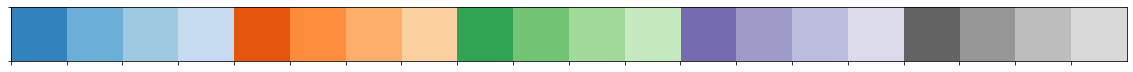

In [11]:
pal = sns.color_palette('tab20c',20)
sns.palplot(pal)

### plot naive

In [12]:
color_list = [
    {
        "mask": results_df.augmented == "not_augmented",
        "color": pal[16],
        "ls": "solid",
        "marker": "o",
        "label": "Baseline",
    },
    {
        "mask": results_df.augmented == "umap_euclidean",
        "color": pal[0],
        "ls": "solid",
        "marker": "o",
        "label": "+ UMAP (Euclidean)",
    },
]

In [13]:
alpha = 0.75
linewidth = 2

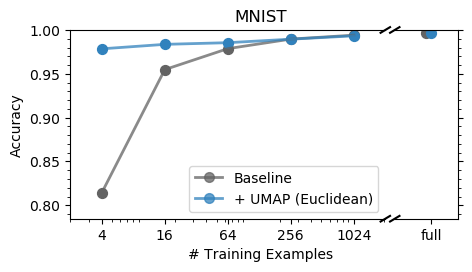

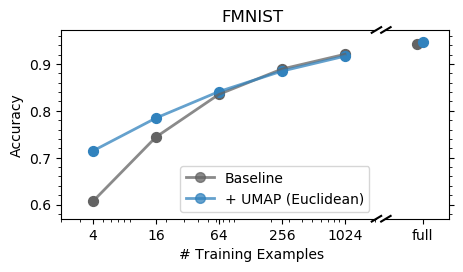

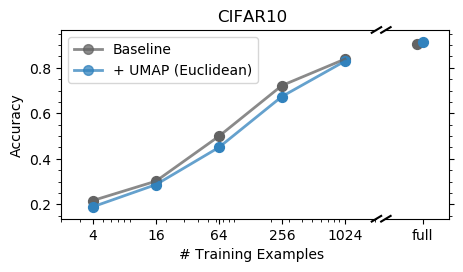

In [14]:
for dataset in datasets:
    fig, (ax, ax2) = plt.subplots(
        1,
        2,
        figsize=(5, 2.5),
        dpi=100,
        sharey=True,
        gridspec_kw={"width_ratios": [5, 1], "wspace": 0.05},
    )

    for li, col_dict in enumerate(color_list):
        mask = col_dict["mask"] & (results_df.dataset == dataset)
        color = col_dict["color"]
        ls = col_dict["ls"]
        label = col_dict["label"]
        marker = col_dict["marker"]

        subset_ds = results_df[mask]
        subset_ds = subset_ds[subset_ds.dset_size_title != "full"]
        nex = subset_ds.labels_per_class.values.astype("int")
        acc = subset_ds.test_acc.values
        ax.scatter(
            nex, acc, color=color, s=50, alpha=1, marker=marker
        )  # , facecolors="none")
        ax.plot(
            nex, acc, linewidth=linewidth, alpha=alpha, color=color, ls=ls
        )  # , label = label

        subset_ds = results_df[mask]
        subset_ds = subset_ds[subset_ds.dset_size_title == "full"]
        # display(subset_ds)
        nex = subset_ds.labels_per_class.values.astype("int")
        acc = subset_ds.test_acc.values
        nex = (
            nex + li / 100 - len(color_list) / 2 / 100
        )  # +(np.random.rand(1)-0.5)*.025
        ax2.scatter(
            nex, acc, color=color, s=50, alpha=1, marker=marker
        )  # , facecolors="none")

        ax.plot(
            [],
            [],
            "-" + marker,
            color=color,
            linewidth=linewidth,
            label=label,
            alpha=alpha,
            markersize=7,
            # markerfacecolor="none",
            ls=ls,
        )

    ax.set_xscale("log")
    ax.set_xticks([4, 16, 64, 256, 1024])
    ax.set_xticklabels([4, 16, 64, 256, 1024])
    # ax.set_ylim([0, 1])
    ax.spines["right"].set_visible(False)
    ax.legend()
    ax.set_xlim([2, 2048])

    # ax2.set_xscale('log')
    ax2.set_xticks([4096])
    ax2.set_xticklabels(["full"])
    ax2.spines["left"].set_visible(False)
    ax2.yaxis.tick_right()

    d = 0.015  # how big to make the diagonal lines in axes coordinates
    # arguments to pass plot, just so we don't keep repeating them
    kwargs = dict(transform=ax.transAxes, color="k", clip_on=False)
    ax.plot((1 - d, 1 + d), (-d, +d), **kwargs)
    ax.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)

    d = 0.015
    offset = 5
    kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
    ax2.plot((-d * offset, +d * offset), (1 - d, 1 + d), **kwargs)
    ax2.plot((-d * offset, +d * offset), (-d, +d), **kwargs)

    ax.minorticks_on()
    ax.tick_params(axis="y", which="minor", direction="out")
        
    ymin, ymax = ax.get_ylim()
    if ymax > 1:
        ymax = 1
    ax.set_ylim([ymin, ymax])

    ax.set_title(dataset.upper(), x=0.605)
    ax.set_ylabel("Accuracy")
    ax.set_xlabel("# Training Examples", x=0.605)
    ensure_dir(FIGURE_DIR / "ssl_results")
    save_fig(FIGURE_DIR / 'ssl_results' /(dataset + '_umap_euclidean'), save_pdf = True)

    plt.show()

### plot consistency-euclidean

In [15]:
color_list = [
    {
        "mask": results_df.augmented == 'not_augmented',
        "color": pal[16],
        "ls": 'solid',
        "marker": 'o',
        "label": "Baseline"
    },
    {
        "mask": results_df.augmented == 'augmented',
        "color": pal[16],
        "ls": 'dashed',
        "marker": 'X',
        "label": "+ Aug."
    },
    
    {
        "mask": results_df.augmented == 'umap_euclidean_augmented',
        "color": pal[0],
        "ls": 'dashed',
        "marker": 'X',
        "label": "+ Aug. + UMAP (Euclidean)"
    },
    

    
]


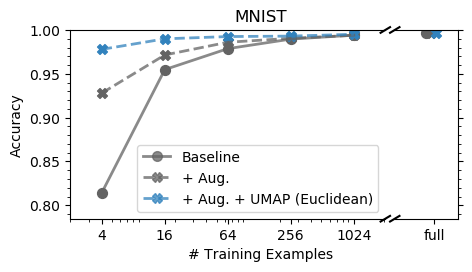

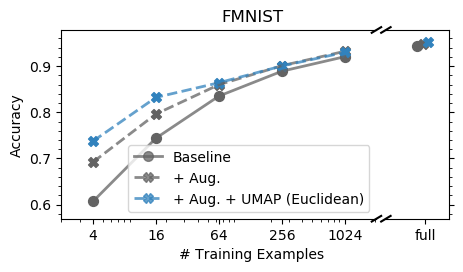

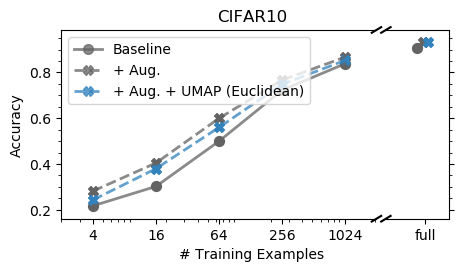

In [16]:
for dataset in datasets:
    fig, (ax, ax2) = plt.subplots(
        1,
        2,
        figsize=(5, 2.5),
        dpi=100,
        sharey=True,
        gridspec_kw={"width_ratios": [5, 1], "wspace": 0.05},
    )

    for li, col_dict in enumerate(color_list):
        mask = col_dict["mask"] & (results_df.dataset == dataset)
        color = col_dict["color"]
        ls = col_dict["ls"]
        label = col_dict["label"]
        marker = col_dict["marker"]

        subset_ds = results_df[mask]
        subset_ds = subset_ds[subset_ds.dset_size_title != "full"]
        nex = subset_ds.labels_per_class.values.astype("int")
        acc = subset_ds.test_acc.values
        ax.scatter(
            nex, acc, color=color, s=50, alpha=1, marker=marker
        )  # , facecolors="none")
        ax.plot(
            nex, acc, linewidth=linewidth, alpha=alpha, color=color, ls=ls
        )  # , label = label

        subset_ds = results_df[mask]
        subset_ds = subset_ds[subset_ds.dset_size_title == "full"]
        # display(subset_ds)
        nex = subset_ds.labels_per_class.values.astype("int")
        acc = subset_ds.test_acc.values
        nex = (
            nex + li / 100 - len(color_list) / 2 / 100
        )  # +(np.random.rand(1)-0.5)*.025
        ax2.scatter(
            nex, acc, color=color, s=50, alpha=1, marker=marker
        )  # , facecolors="none")

        ax.plot(
            [],
            [],
            "-" + marker,
            color=color,
            linewidth=linewidth,
            label=label,
            alpha=alpha,
            markersize=7,
            # markerfacecolor="none",
            ls=ls,
        )

    ax.set_xscale("log")
    ax.set_xticks([4, 16, 64, 256, 1024])
    ax.set_xticklabels([4, 16, 64, 256, 1024])
    # ax.set_ylim([0, 1])
    ax.spines["right"].set_visible(False)
    ax.legend()
    ax.set_xlim([2, 2048])

    # ax2.set_xscale('log')
    ax2.set_xticks([4096])
    ax2.set_xticklabels(["full"])
    ax2.spines["left"].set_visible(False)
    ax2.yaxis.tick_right()

    d = 0.015  # how big to make the diagonal lines in axes coordinates
    # arguments to pass plot, just so we don't keep repeating them
    kwargs = dict(transform=ax.transAxes, color="k", clip_on=False)
    ax.plot((1 - d, 1 + d), (-d, +d), **kwargs)
    ax.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)

    d = 0.015
    offset = 5
    kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
    ax2.plot((-d * offset, +d * offset), (1 - d, 1 + d), **kwargs)
    ax2.plot((-d * offset, +d * offset), (-d, +d), **kwargs)

    ax.minorticks_on()
    ax.tick_params(axis="y", which="minor", direction="out")
        
    ymin, ymax = ax.get_ylim()
    if ymax > 1:
        ymax = 1
    ax.set_ylim([ymin, ymax])

    ax.set_title(dataset.upper(), x=0.605)
    ax.set_ylabel("Accuracy")
    ax.set_xlabel("# Training Examples", x=0.605)
    ensure_dir(FIGURE_DIR / "ssl_results")
    save_fig(FIGURE_DIR / 'ssl_results' /(dataset + '_umap_euclidean_consistency'), save_pdf = True)

    plt.show()

### plot learned metric

In [17]:
color_list = [
    {
        "mask": results_df.augmented == "not_augmented",
        "color": pal[16],
        "ls": "solid",
        "marker": "o",
        "label": "Baseline",
    },
    {
        "mask": results_df.augmented == "augmented",
        "color": pal[16],
        "ls": "dashed",
        "marker": "X",
        "label": "+ Aug.",
    },
    {
        "mask": results_df.augmented == "umap_learned",
        "color": pal[4],
        "ls": "solid",
        "marker": "o",
        "label": "+ UMAP (learned)",
    },
    {
        "mask": results_df.augmented == "umap_augmented_learned",
        "color": pal[4],
        "ls": "dashed",
        "marker": "X",
        "label": "+Aug + UMAP (learned)",
    },
]


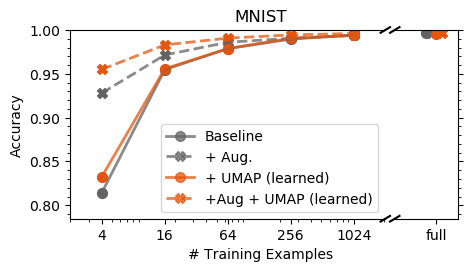

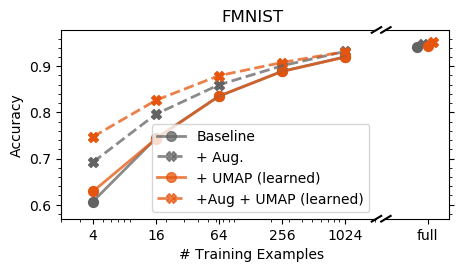

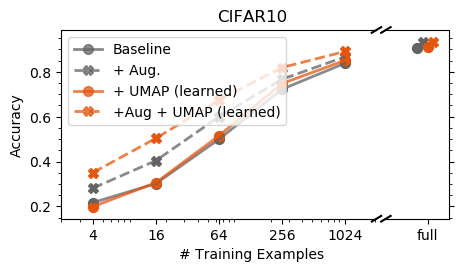

In [18]:
for dataset in datasets:
    fig, (ax, ax2) = plt.subplots(
        1,
        2,
        figsize=(5, 2.5),
        dpi=100,
        sharey=True,
        gridspec_kw={"width_ratios": [5, 1], "wspace": 0.05},
    )

    for li, col_dict in enumerate(color_list):
        mask = col_dict["mask"] & (results_df.dataset == dataset)
        color = col_dict["color"]
        ls = col_dict["ls"]
        label = col_dict["label"]
        marker = col_dict["marker"]

        subset_ds = results_df[mask]
        subset_ds = subset_ds[subset_ds.dset_size_title != "full"]
        nex = subset_ds.labels_per_class.values.astype("int")
        acc = subset_ds.test_acc.values
        ax.scatter(
            nex, acc, color=color, s=50, alpha=1, marker=marker
        )  # , facecolors="none")
        ax.plot(
            nex, acc, linewidth=linewidth, alpha=alpha, color=color, ls=ls
        )  # , label = label

        subset_ds = results_df[mask]
        subset_ds = subset_ds[subset_ds.dset_size_title == "full"]
        # display(subset_ds)
        nex = subset_ds.labels_per_class.values.astype("int")
        acc = subset_ds.test_acc.values
        nex = (
            nex + li / 100 - len(color_list) / 2 / 100
        )  # +(np.random.rand(1)-0.5)*.025
        ax2.scatter(
            nex, acc, color=color, s=50, alpha=1, marker=marker
        )  # , facecolors="none")

        ax.plot(
            [],
            [],
            "-" + marker,
            color=color,
            linewidth=linewidth,
            label=label,
            alpha=alpha,
            markersize=7,
            # markerfacecolor="none",
            ls=ls,
        )

    ax.set_xscale("log")
    ax.set_xticks([4, 16, 64, 256, 1024])
    ax.set_xticklabels([4, 16, 64, 256, 1024])
    # ax.set_ylim([0, 1])
    ax.spines["right"].set_visible(False)
    ax.legend()
    ax.set_xlim([2, 2048])

    # ax2.set_xscale('log')
    ax2.set_xticks([4096])
    ax2.set_xticklabels(["full"])
    ax2.spines["left"].set_visible(False)
    ax2.yaxis.tick_right()

    d = 0.015  # how big to make the diagonal lines in axes coordinates
    # arguments to pass plot, just so we don't keep repeating them
    kwargs = dict(transform=ax.transAxes, color="k", clip_on=False)
    ax.plot((1 - d, 1 + d), (-d, +d), **kwargs)
    ax.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)

    d = 0.015
    offset = 5
    kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
    ax2.plot((-d * offset, +d * offset), (1 - d, 1 + d), **kwargs)
    ax2.plot((-d * offset, +d * offset), (-d, +d), **kwargs)

    ax.minorticks_on()
    ax.tick_params(axis="y", which="minor", direction="out")
        
    ymin, ymax = ax.get_ylim()
    if ymax > 1:
        ymax = 1
    ax.set_ylim([ymin, ymax])

    ax.set_title(dataset.upper(), x=0.605)
    ax.set_ylabel("Accuracy")
    ax.set_xlabel("# Training Examples", x=0.605)
    ensure_dir(FIGURE_DIR / "ssl_results")
    save_fig(FIGURE_DIR / 'ssl_results' /(dataset + '_umap_learned_consistency'), save_pdf = True)

    plt.show()

In [19]:
### create tables

In [20]:
results_df[:3]

,dataset,labels_per_class,augmented,timestamp,location,test_acc,dset_size_title
0,mnist,4,not_augmented,mnist_4____2020_08_23_13_59_31_357892_baseline,/mnt/cube/tsainbur/Projects/github_repos/umap_...,0.8143,4
1,mnist,16,not_augmented,mnist_16____2020_08_23_14_13_03_306576_baseline,/mnt/cube/tsainbur/Projects/github_repos/umap_...,0.9548,16
2,mnist,64,not_augmented,mnist_64____2020_08_23_14_13_19_397319_baseline,/mnt/cube/tsainbur/Projects/github_repos/umap_...,0.9787,64


In [21]:
"""results_only = results_df[['dataset', 'labels_per_class', 'augmented', 'test_acc']]
r_only_cols = results_only.assign(key=results_only.groupby('augmented').cumcount()).pivot('key','augmented','test_acc')
r_only_addtl = results_only.assign(key=results_only.groupby('augmented').cumcount())[['dataset', 'labels_per_class', 'key']]
results_only = r_only_addtl.merge(r_only_cols, on = 'key').set_index(['dataset', 'labels_per_class']).drop_duplicates() 
results_only = results_only.drop(columns='key')
results_only"""

"results_only = results_df[['dataset', 'labels_per_class', 'augmented', 'test_acc']]\nr_only_cols = results_only.assign(key=results_only.groupby('augmented').cumcount()).pivot('key','augmented','test_acc')\nr_only_addtl = results_only.assign(key=results_only.groupby('augmented').cumcount())[['dataset', 'labels_per_class', 'key']]\nresults_only = r_only_addtl.merge(r_only_cols, on = 'key').set_index(['dataset', 'labels_per_class']).drop_duplicates() \nresults_only = results_only.drop(columns='key')\nresults_only"

In [22]:
results_only = results_df[['dataset', 'labels_per_class', 'augmented', 'test_acc']]
r_only_cols = results_only.assign(key=results_only.groupby('labels_per_class').cumcount()).pivot('key','labels_per_class','test_acc')
r_only_addtl = results_only.assign(key=results_only.groupby('labels_per_class').cumcount())[['dataset', 'augmented', 'key']]
results_only = r_only_addtl.merge(r_only_cols, on = 'key').set_index(['dataset', 'augmented']).drop_duplicates() 
results_only = results_only.drop(columns='key')
results_only = results_only[['4', '64', '256', '1024',4096]] 
results_only


4      64     256    1024    4096
dataset augmented                                                       
mnist   not_augmented             0.8143  0.9787  0.9896  0.9941  0.9965
        augmented                 0.9280  0.9860  0.9905  0.9939  0.9963
        umap_euclidean            0.9785  0.9855  0.9895  0.9933  0.9964
        umap_learned              0.8325  0.9788  0.9905  0.9938  0.9957
        umap_augmented_learned    0.9550  0.9907  0.9944  0.9960  0.9960
        umap_euclidean_augmented  0.9779  0.9925  0.9930  0.9951  0.9967
fmnist  not_augmented             0.6068  0.8351  0.8890  0.9205  0.9427
        augmented                 0.6920  0.8598  0.9009  0.9322  0.9488
        umap_euclidean            0.7144  0.8410  0.8846  0.9165  0.9466
        umap_learned              0.6286  0.8352  0.8887  0.9196  0.9443
        umap_augmented_learned    0.7470  0.8797  0.9081  0.9318  0.9525
        umap_euclidean_augmented  0.7373  0.8640  0.9003  0.9299  0.9521
cifar10 not_augmented             0.2170  0.4992  0.7220  0.8380  0.9049
        augmented                 0.2814  0.5993  0.7664  0.8667  0.9332
        umap_euclidean            0.1895  0.4503  0.6737  0.8289  0.9129
        umap_learned              0.1988  0.5148  0.7475  0.8505  0.9118
        umap_augmented_learned    0.3509  0.6742  0.8190  0.8907  0.9324
        umap_euclidean_augmented  0.2427  0.5596  0.7476  0.8524  0.9319

In [24]:
print(
    results_only.to_latex(bold_rows=True)
    
    .replace("umap\_learned", "+ UMAP (learned)")
    .replace("umap\_augmented\_learned", "+Aug. + UMAP (learned)")
    .replace("umap\_euclidean\_augmented", "Aug. + UMAP (Euclidean)")
    .replace("4096", "full")
    .replace("not\_augmented", "Baseline")
    .replace("augmented", "+ Aug.")
    .replace("umap\_euclidean", "+ UMAP (Euclidean)")
    .replace("cifar10", "CIFAR10")
    .replace("mnist", "MNIST")
    .replace("fmnist", "FMNIST")
)

\begin{tabular}{llrrrrr}
\toprule
        &                          &       4 &      64 &     256 &    1024 &    full \\
\textbf{dataset} & \textbf{+ Aug.} &         &         &         &         &         \\
\midrule
\textbf{MNIST} & \textbf{Baseline} &  0.8143 &  0.9787 &  0.9896 &  0.9941 &  0.9965 \\
        & \textbf{+ Aug.} &  0.9280 &  0.9860 &  0.9905 &  0.9939 &  0.9963 \\
        & \textbf{+ UMAP (Euclidean)} &  0.9785 &  0.9855 &  0.9895 &  0.9933 &  0.9964 \\
        & \textbf{+ UMAP (learned)} &  0.8325 &  0.9788 &  0.9905 &  0.9938 &  0.9957 \\
        & \textbf{+Aug. + UMAP (learned)} &  0.9550 &  0.9907 &  0.9944 &  0.9960 &  0.9960 \\
        & \textbf{Aug. + UMAP (Euclidean)} &  0.9779 &  0.9925 &  0.9930 &  0.9951 &  0.9967 \\
\textbf{fMNIST} & \textbf{Baseline} &  0.6068 &  0.8351 &  0.8890 &  0.9205 &  0.9427 \\
        & \textbf{+ Aug.} &  0.6920 &  0.8598 &  0.9009 &  0.9322 &  0.9488 \\
        & \textbf{+ UMAP (Euclidean)} &  0.7144 &  0.8410 &  0.8846 &  0.91